# Facenet features space exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imagine.color import conversion

In [2]:
df = pd.read_csv("preprocessed/facenet.csv", na_values=-1).dropna().convert_dtypes()
df

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,lipstick_b,eyeshadow0_r,eyeshadow0_g,eyeshadow0_b,eyeshadow1_r,eyeshadow1_g,eyeshadow1_b,eyeshadow2_r,eyeshadow2_g,eyeshadow2_b
0,15NMOAJBekg,-0.016226,-0.013635,-0.079536,-0.002791,0.047645,-0.058358,-0.038336,0.061421,0.036531,...,111,88,55,61,143,85,90,166,105,107
1,XTZ8E-ZA-QQ,-0.017681,0.000561,-0.105104,0.013779,0.045190,-0.019541,-0.000537,0.066264,0.029692,...,139,115,56,44,154,101,95,198,142,135
2,2SmHfiZJ7-Q,-0.040154,-0.008907,-0.106783,0.011886,0.062142,-0.033934,0.002774,0.056713,0.025392,...,89,114,66,67,156,99,99,206,176,182
3,8J7-IArNlr0,-0.000596,-0.018402,-0.091914,0.007647,0.051827,-0.061854,-0.036372,0.060282,0.030137,...,71,72,47,37,111,80,65,150,127,111
4,QiYDujOxpCY,-0.016801,0.010733,-0.097398,0.016540,0.051729,-0.009234,-0.011877,0.076331,-0.000219,...,48,72,31,24,123,62,47,151,87,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0KChfqqX3D8,-0.006454,-0.052994,-0.099188,-0.003362,0.039623,-0.066729,-0.021220,0.065812,0.034992,...,99,102,61,56,149,103,95,195,149,141
956,QKhg9ryqwqw,-0.010681,-0.007790,-0.097232,0.026039,0.043888,-0.034630,-0.018465,0.059218,0.039086,...,111,71,41,40,128,78,76,180,121,120
957,g-WIa9UHUy0,-0.012408,-0.030366,-0.111139,-0.007829,0.034117,-0.035815,-0.012807,0.075449,0.012355,...,109,60,43,43,174,142,133,195,164,155
958,-nxUdNtZTJA,-0.023892,-0.022478,-0.073180,0.006865,0.050003,-0.052599,-0.022712,0.046005,0.039793,...,101,70,37,38,118,68,66,154,92,81


In [3]:
face_features = df.iloc[:, 1:513]
makeup_features = df.iloc[:, 513:]

In [4]:
parts = {
    "lipstick" : makeup_features.iloc[:, 0:3],
    "eyeshadow" : makeup_features.iloc[:, 3:6]
}

In [5]:
from sklearn.manifold import TSNE
k=2
dimensionality_reductor = TSNE(n_components=k)
face_features_reduced = pd.DataFrame(dimensionality_reductor.fit_transform(face_features), columns=[str(i) for i in range(k)])

In [6]:
def show_feature_space(df, scale=15, name=None, colors=None):
    plt.figure(figsize=(scale, scale))
    if colors is not None:
        sns.scatterplot(x=df.columns[0], y=df.columns[1], data=face_features_reduced, c=colors)
    else:
        sns.scatterplot(x=df.columns[0], y=df.columns[1], data=face_features_reduced)
    if name is not None:
        plt.suptitle(name)
    plt.tight_layout()
    plt.show()

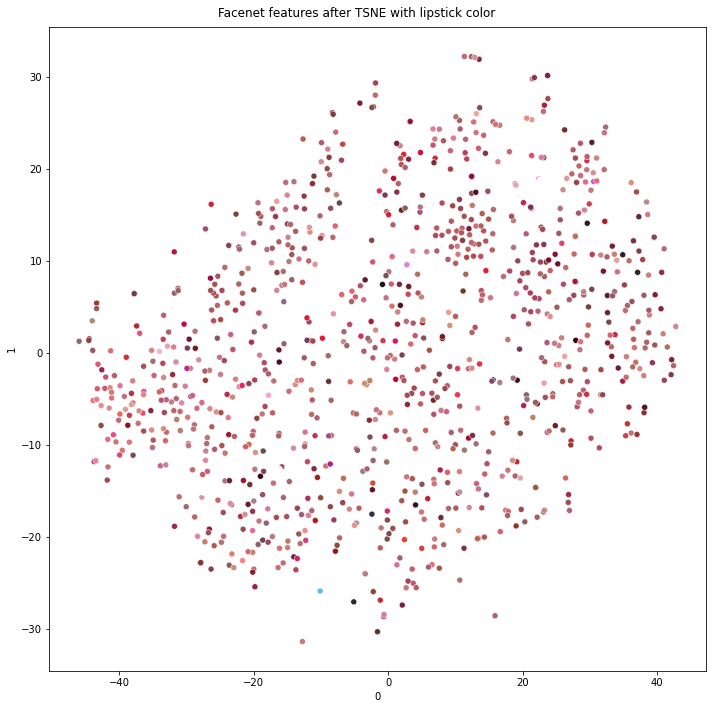

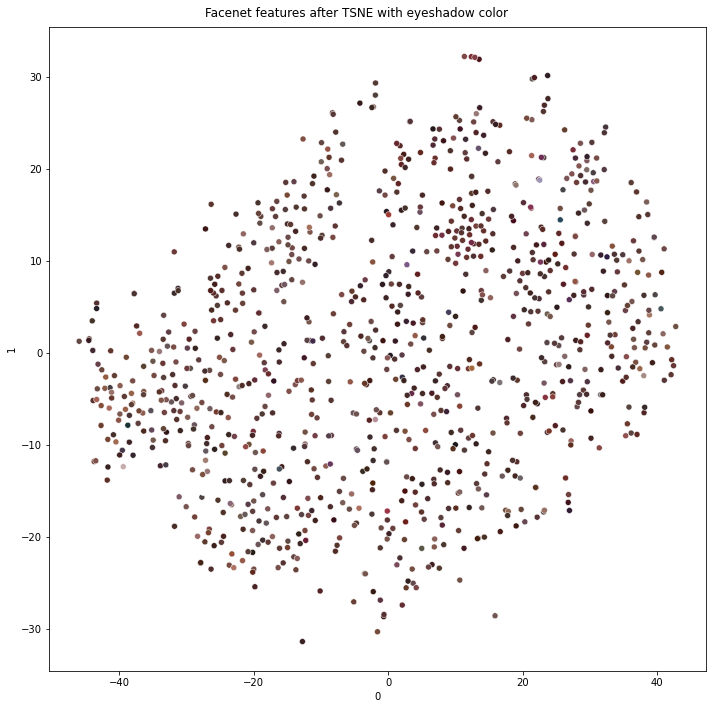

In [7]:
for p in parts:
    show_feature_space(face_features_reduced,
                       scale=10,
                       name="Facenet features after {} with {} color".format(type(dimensionality_reductor).__name__ ,p), 
                       colors=parts[p].values/255.)